In [7]:
from craft import uvfits
import numpy as np
from pylab import *
import os
%matplotlib inline

In [8]:
d = '/CRACO/DATA_01/craco/SB065551/scans/00/20240903102337/snippets'

In [40]:
cal_uvfits = uvfits.open(os.path.join(d, 'cal_dedisp.uvfits'))

In [41]:
cal_uvfits.fast_time_blocks?

Signature:
cal_uvfits.fast_time_blocks(
    nt,
    fetch_uvws=False,
    istart=0,
    keep_all_baselines=False,
)
Docstring:
Reads raw data from uvfits file as an array and returns a block of nt samples
:nt: number of times to get
:fetch_uvws: True if you want to return uvws in teh second parameter

:istart: Sample number to start at. Doesnt have to be a multiple of nt
File:      /CRACO/SOFTWARE/ban115/craft/src/craft/uvfits.py
Type:      method

In [243]:
blk = next(cal_uvfits.fast_time_blocks(256, istart=768))

In [244]:
len(blk)

2

In [245]:
list(map(type,blk))

[numpy.ma.core.MaskedArray, list]

In [246]:
blk = blk[0]
blk.shape

(231, 1, 1, 1, 288, 1, 256)

In [247]:
blk = blk[:,0,0,0,:,0,:]

In [248]:
blk.shape

(231, 288, 256)

In [249]:
nbl, nchan, ntime = blk.shape

In [250]:
blk.mask[:,90:104,:] = True
blk -= blk[:,:,:30].mean(axis=2,keepdims=True)
#blk /= blk[:,:,:30].std(axis=2,keepdims=True)
blk /= blk.real[:,:,:30].std()

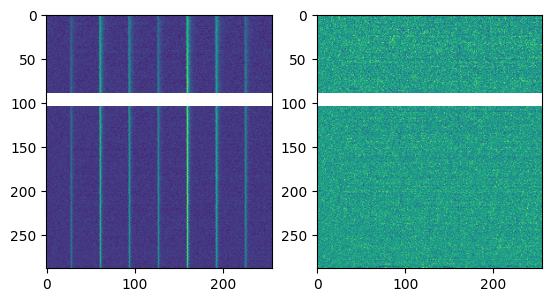

In [251]:
fig,ax = subplots(1,2)
ax[0].imshow(blk.real.sum(axis=0))
ax[1].imshow(blk.imag.sum(axis=0))

Text(0.5, 0, 'channel')

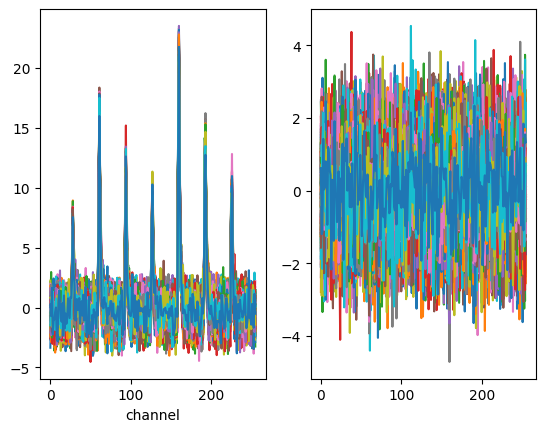

In [275]:
fig, ax = subplots(1,2)
ax[0].plot(blk.real.sum(axis=1).T/np.sqrt(nchan))
_= ax[1].plot(blk.imag.sum(axis=1).T/np.sqrt(nchan))
ax[0].set_xlabel('channel')


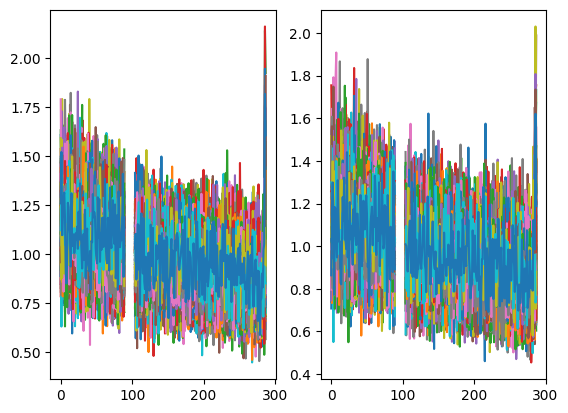

In [253]:
fig,ax = subplots(1,2)
ax[0].plot(blk[:,:,:30].real.std(axis=2).T)
_ = ax[1].plot(blk[:,:,:30].imag.std(axis=2).T)

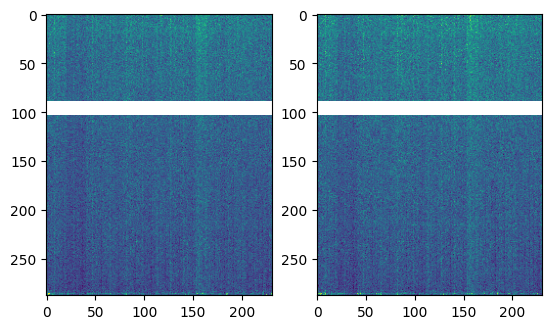

In [254]:
fig,ax = subplots(1,2)
ax[0].imshow(blk[:,:,:30].real.std(axis=2).T)
_ = ax[1].imshow(blk[:,:,:30].imag.std(axis=2).T)

In [255]:
blk.shape

(231, 288, 256)

In [256]:
psamp = int(np.round(455e-3/13.7e-3)) # period in samples
nperiod = int(np.floor(ntime/psamp)) # number of pulse periods in the dataset
nperiod

7

In [257]:
blkfold = blk[:,:,:nperiod*psamp].reshape(nbl,nchan,nperiod,psamp)

In [258]:
blkfold.shape

(231, 288, 7, 33)

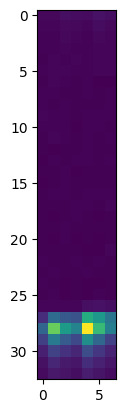

In [259]:
imshow(blkfold.real.mean(axis=(0,1)).T)

In [260]:
peakbin = 28
peakpulse = 4

Text(0, 0.5, 'Baseline S/N')

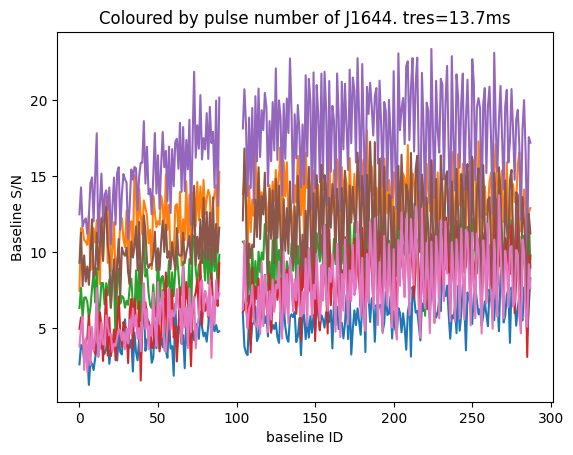

In [272]:
_ = plot(blkfold.real[:,:,:,peakbin].sum(axis=0)/np.sqrt(nchan))
title('Coloured by pulse number of J1644. tres=13.7ms')
xlabel('baseline ID')
ylabel('Baseline S/N')

Text(0, 0.5, 'Normalised S/N')

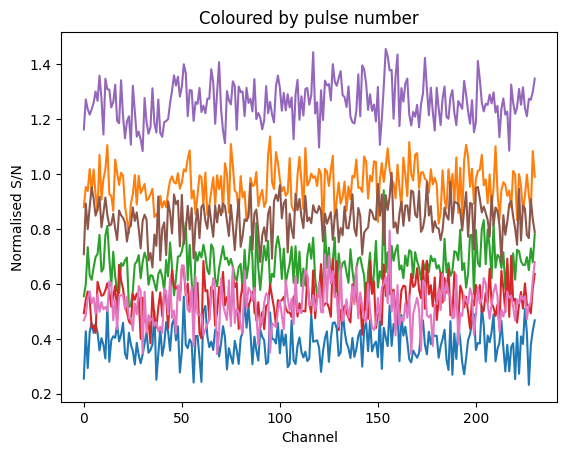

In [262]:
_ = plot(blkfold.real[:,:,:,peakbin].mean(axis=1))
title('Coloured by pulse number')
xlabel('Channel')
ylabel('Normalised S/N')

Text(0.5, 1.0, 'J1644 pulses - cumulative sum of visiblities')

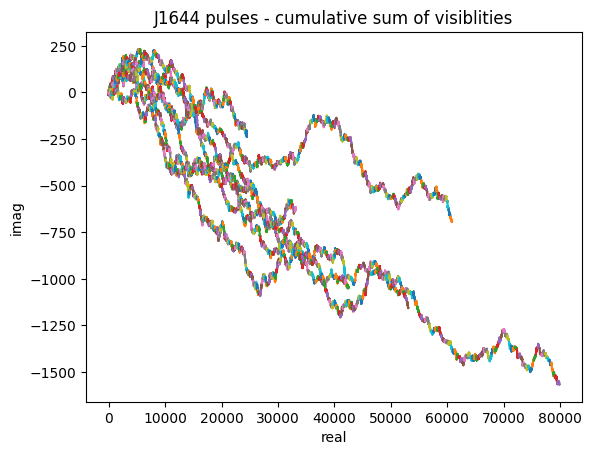

In [268]:
for ipulse in range(nperiod):
    start = 0+0j

    for ibl in range(nbl):
        x = np.cumsum(blkfold[ibl,:,ipulse,peakbin]) + start
        plot(x.real,x.imag)
        start = x[-1]

xlabel('real')
ylabel('imag')
title('J1644 pulses - cumulative sum of visiblities')
#ylim(-4000,4000)

Text(0.5, 1.0, 'J1644 pulse - cumulative sum of visiblities')

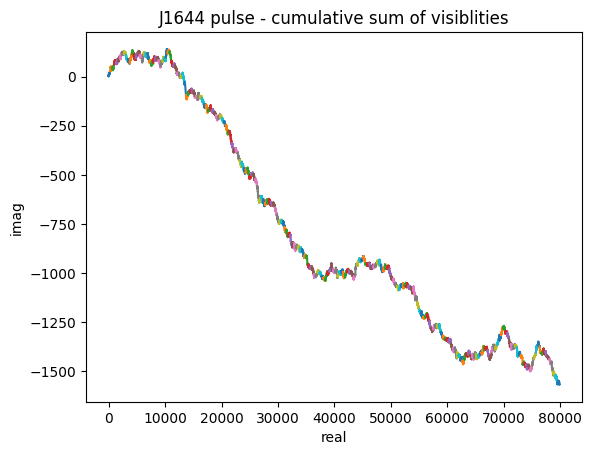

In [274]:
start = 0
for ibl in range(nbl):
    x = np.cumsum(blkfold[ibl,:,peakpulse,peakbin]) + start
    plot(x.real,x.imag)
    start = x[-1]

xlabel('real')
ylabel('imag')
title('J1644 pulse - cumulative sum of visiblities')